In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [3]:
R = Runner(verbose=True, classifier='unetplus', base_filters=8)

*** GP2 ***
Working directory: /tmp/tmp20dpt8vqGP2
Verbose mode active!


/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 8)  80          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 512, 512, 8)  32          conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 512, 512, 8)  0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [5]:
images.shape

(10000, 512, 512, 1)

In [6]:
masks.shape

(10000, 512, 512, 1)

In [7]:
print(images.max())

255


In [8]:
print(images.min())

0


In [9]:
print(masks.max())

True


In [10]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [11]:
R.setup_data(images, masks, dataset_size=10000, weights=weights)

Weights OK!


In [12]:
RUNS = 8

In [ ]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
8/8 [==============================] - 29s 2s/step - loss: 0.6659 - dice_coef: 0.1613 - val_loss: 0.6659 - val_dice_coef: 0.1620
Epoch 2/100
8/8 [==============================] - 10s 1s/step - loss: 0.6650 - dice_coef: 0.1619 - val_loss: 0.6659 - val_dice_coef: 0.1620
Epoch 3/100
8/8 [==============================] - 10s 1s/step - loss: 0.6640 - dice_coef: 0.1624 - val_loss: 0.6659 - val_dice_coef: 0.1620
Epoch 4/100
8/8 [==============================] - 10s 1s/step - loss: 0.6629 - dice_coef: 0.1629 - val_loss: 0.6660 - val_dice_coef: 0.1620
Epoch 5/100
8/8 [==============================] - 10s 1s/step - loss: 0.6618 - dice_coef: 0.1633 - val_loss: 0.6662 - val_dice_coef: 0.1620
Epoch 6/100
8/8 [==============================] - 10s 1s/step - loss: 0.6605 - dice_coef: 0.1637 - val_loss: 0.6665 - val_dice_coef: 0.1619
Epoch 7/100
8/8 [==============================] - 10s 1s/step - loss: 0.6591 - dice_coef: 0.1645 - val_loss: 0.6670 - val_dice_coef: 0.1619
Ep

Epoch 59/100
8/8 [==============================] - 10s 1s/step - loss: 0.6066 - dice_coef: 0.1718 - val_loss: 0.6744 - val_dice_coef: 0.1624
Epoch 60/100
8/8 [==============================] - 10s 1s/step - loss: 0.6058 - dice_coef: 0.1718 - val_loss: 0.6740 - val_dice_coef: 0.1624
Epoch 61/100
8/8 [==============================] - 10s 1s/step - loss: 0.6051 - dice_coef: 0.1719 - val_loss: 0.6725 - val_dice_coef: 0.1625
Epoch 62/100
8/8 [==============================] - 10s 1s/step - loss: 0.6043 - dice_coef: 0.1721 - val_loss: 0.6729 - val_dice_coef: 0.1624
Epoch 63/100
8/8 [==============================] - 10s 1s/step - loss: 0.6035 - dice_coef: 0.1722 - val_loss: 0.6731 - val_dice_coef: 0.1624
Epoch 64/100
8/8 [==============================] - 10s 1s/step - loss: 0.6027 - dice_coef: 0.1722 - val_loss: 0.6732 - val_dice_coef: 0.1623
Epoch 65/100
8/8 [==============================] - 10s 1s/step - loss: 0.6020 - dice_coef: 0.1723 - val_loss: 0.6728 - val_dice_coef: 0.1623
Epoch 

Removed: 109 Filled: 109
TOOK 1249.0262396335602 seconds
***
RUN: 1
Epoch 1/100
10/10 [==============================] - 16s 2s/step - loss: 0.5759 - dice_coef: 0.1750 - val_loss: 0.6602 - val_dice_coef: 0.1622
Epoch 2/100
10/10 [==============================] - 12s 1s/step - loss: 0.5751 - dice_coef: 0.1747 - val_loss: 0.6562 - val_dice_coef: 0.1627
Epoch 3/100
10/10 [==============================] - 12s 1s/step - loss: 0.5743 - dice_coef: 0.1747 - val_loss: 0.6560 - val_dice_coef: 0.1627
Epoch 4/100
10/10 [==============================] - 12s 1s/step - loss: 0.5734 - dice_coef: 0.1747 - val_loss: 0.6579 - val_dice_coef: 0.1623
Epoch 5/100
10/10 [==============================] - 12s 1s/step - loss: 0.5726 - dice_coef: 0.1750 - val_loss: 0.6576 - val_dice_coef: 0.1623
Epoch 6/100
10/10 [==============================] - 11s 1s/step - loss: 0.5717 - dice_coef: 0.1749 - val_loss: 0.6570 - val_dice_coef: 0.1623
Epoch 7/100
10/10 [==============================] - 11s 1s/step - loss: 0

10/10 [==============================] - 12s 1s/step - loss: 0.5341 - dice_coef: 0.1789 - val_loss: 0.6057 - val_dice_coef: 0.1669
Epoch 58/100
10/10 [==============================] - 12s 1s/step - loss: 0.5334 - dice_coef: 0.1796 - val_loss: 0.6128 - val_dice_coef: 0.1657
Epoch 59/100
10/10 [==============================] - 12s 1s/step - loss: 0.5327 - dice_coef: 0.1788 - val_loss: 0.6190 - val_dice_coef: 0.1646
Epoch 60/100
10/10 [==============================] - 12s 1s/step - loss: 0.5321 - dice_coef: 0.1793 - val_loss: 0.6155 - val_dice_coef: 0.1651
Epoch 61/100
10/10 [==============================] - 12s 1s/step - loss: 0.5314 - dice_coef: 0.1793 - val_loss: 0.6171 - val_dice_coef: 0.1648
Epoch 62/100
10/10 [==============================] - 12s 1s/step - loss: 0.5307 - dice_coef: 0.1795 - val_loss: 0.6180 - val_dice_coef: 0.1646
Epoch 63/100
10/10 [==============================] - 12s 1s/step - loss: 0.5301 - dice_coef: 0.1792 - val_loss: 0.5858 - val_dice_coef: 0.1696
Epoch

Replacing 96 from 289 !
D_relabeled_ 96
selected_ids ['cc85f163-f3d4-4cdd-923f-7e8e21b131cf', '7039a39a-90fe-4c99-ac4c-597016ddc24e', '547c894f-55a8-4808-a54c-c0167634c55c', '31a9f6de-a56e-4262-afe3-485e3e034494', 'b02b0d7e-745a-47a0-9624-beb5ec9e01c8', '3962bf63-7123-4e45-b79a-6263daa4acf8', 'f987937b-9650-40e6-a81e-3ee1aa567d8f', 'e6ea9e34-c1e9-4f02-afd4-ca7d3c6e9cf2', '7de279c9-b6b1-4fca-9e67-2239b339f47c', 'c9bb05e0-659e-40a0-96ef-a9709cc805d0', 'f13b9dae-c7e2-4606-bfcf-2730f69caa54', 'bb1d75d2-0e18-4645-afea-ff83dd8ed869', '07bb33fc-837a-4e13-b3d0-e30715358b5f', 'b22469e3-9590-4863-8d6b-68119a6e80a3', 'e9e258f5-c08a-438f-9868-0fc0a1893c4e', '5758350b-2b20-42f2-a795-eecaacf28778', '8ec55fae-c046-42d7-8fc6-9518e183a7c1', 'f4db9ff9-20f7-4811-bd95-f01639ef3aa1', 'e022ffbf-9d09-49c7-83ce-54379a528a94', 'e2e716a7-7c93-4c89-8e3e-901ae4dbbe83', 'e3a812f6-9d88-44fa-89cf-7e9de4234820', '714dca1b-392c-4963-a42a-100b9cfa71ca', '489ebb72-c438-4a76-a8a1-77363ede4e73', 'f5d1c2bf-e4d4-4bc4-a346-8

12/12 [==============================] - 13s 1s/step - loss: 0.5048 - dice_coef: 0.1823 - val_loss: 0.5771 - val_dice_coef: 0.1689
Epoch 4/100
12/12 [==============================] - 13s 1s/step - loss: 0.5044 - dice_coef: 0.1830 - val_loss: 0.6241 - val_dice_coef: 0.1609
Epoch 5/100
12/12 [==============================] - 13s 1s/step - loss: 0.5035 - dice_coef: 0.1816 - val_loss: 0.6134 - val_dice_coef: 0.1625
Epoch 6/100
12/12 [==============================] - 13s 1s/step - loss: 0.5027 - dice_coef: 0.1823 - val_loss: 0.6117 - val_dice_coef: 0.1627
Epoch 7/100
12/12 [==============================] - 13s 1s/step - loss: 0.5020 - dice_coef: 0.1854 - val_loss: 0.5987 - val_dice_coef: 0.1648
Epoch 8/100
12/12 [==============================] - 13s 1s/step - loss: 0.5012 - dice_coef: 0.1832 - val_loss: 0.5995 - val_dice_coef: 0.1646
Epoch 9/100
12/12 [==============================] - 13s 1s/step - loss: 0.5005 - dice_coef: 0.1783 - val_loss: 0.6156 - val_dice_coef: 0.1619
Epoch 10/10

12/12 [==============================] - 13s 1s/step - loss: 0.4666 - dice_coef: 0.1870 - val_loss: 0.5429 - val_dice_coef: 0.1709
Epoch 61/100
12/12 [==============================] - 13s 1s/step - loss: 0.4660 - dice_coef: 0.1897 - val_loss: 0.5381 - val_dice_coef: 0.1717
Epoch 62/100
12/12 [==============================] - 13s 1s/step - loss: 0.4653 - dice_coef: 0.1844 - val_loss: 0.5359 - val_dice_coef: 0.1720
Epoch 63/100
12/12 [==============================] - 13s 1s/step - loss: 0.4647 - dice_coef: 0.1845 - val_loss: 0.5416 - val_dice_coef: 0.1711
Epoch 64/100
12/12 [==============================] - 13s 1s/step - loss: 0.4641 - dice_coef: 0.1862 - val_loss: 0.5399 - val_dice_coef: 0.1713
Epoch 65/100
12/12 [==============================] - 13s 1s/step - loss: 0.4635 - dice_coef: 0.1870 - val_loss: 0.5567 - val_dice_coef: 0.1680
Epoch 66/100
12/12 [==============================] - 13s 1s/step - loss: 0.4629 - dice_coef: 0.1873 - val_loss: 0.5369 - val_dice_coef: 0.1715
Epoch

D_relabeled_ 96
selected_ids ['11814fda-7806-4646-b9c9-354b7eb25ae1', 'b05ad8c5-7b37-4e40-8734-d48954706e7f', '06c6a8e3-5aca-4453-bf9d-4acd0eeeba12', '1c970345-4a28-4d78-b797-a6f8c0799e0d', '0e58299d-8202-4682-90b7-6a6c03a50588', '93a54704-0180-4320-8a1f-d67f7581758d', '10a4e3e1-2141-4d1b-a19f-c372b0421175', '4c65398f-a76b-4024-9c92-b76ddb8a49e7', 'bfe7da4d-924b-4a8f-96b9-4bc9624e0127', '2e3ee3ac-2680-418c-b57c-b89f14d9ad54', 'f3962894-8e37-41bb-b623-9e3c7a3e5c9f', '8b6cc40a-ebed-4c72-9a75-6313cd646a08', '69dff069-d618-4a91-971d-356d4b5ac5d7', 'e9382684-883d-4f7e-a20e-4e860cd4a7e6', '86901f59-9470-4383-835f-02b6ce1a015f', 'c4fc7027-597a-4c4b-9596-deffe7ea4868', 'b8bb01ed-f382-4db8-9639-65a1c749c901', '43b17fed-8eaf-4704-a8eb-72b7e980015a', '9823f71d-7886-4bd4-927e-459293eeca39', '0505497e-cbc3-43d4-8ff2-86b00142a865', 'fc0e74f3-1e9f-46e6-bc4c-05393988bb74', '7f07008f-d37a-4945-99f4-e60bc6af275d', '07a77253-d61f-4225-9047-42f6b8186f53', 'f8a5f876-fa1e-445d-b6a1-c039bff139f3', 'e4506f55-

Epoch 4/100
13/13 [==============================] - 14s 1s/step - loss: 0.4399 - dice_coef: 0.1906 - val_loss: 0.5132 - val_dice_coef: 0.1736
Epoch 5/100
13/13 [==============================] - 15s 1s/step - loss: 0.4393 - dice_coef: 0.1911 - val_loss: 0.5021 - val_dice_coef: 0.1759
Epoch 6/100
13/13 [==============================] - 14s 1s/step - loss: 0.4387 - dice_coef: 0.1907 - val_loss: 0.4988 - val_dice_coef: 0.1764
Epoch 7/100
13/13 [==============================] - 15s 1s/step - loss: 0.4381 - dice_coef: 0.1906 - val_loss: 0.4931 - val_dice_coef: 0.1777
Epoch 8/100
13/13 [==============================] - 14s 1s/step - loss: 0.4375 - dice_coef: 0.1910 - val_loss: 0.4875 - val_dice_coef: 0.1787
Epoch 9/100
13/13 [==============================] - 14s 1s/step - loss: 0.4369 - dice_coef: 0.1912 - val_loss: 0.4918 - val_dice_coef: 0.1776
Epoch 10/100
13/13 [==============================] - 14s 1s/step - loss: 0.4362 - dice_coef: 0.1914 - val_loss: 0.4979 - val_dice_coef: 0.176

Epoch 61/100
13/13 [==============================] - 14s 1s/step - loss: 0.4066 - dice_coef: 0.1961 - val_loss: 0.4390 - val_dice_coef: 0.1862
Epoch 62/100
13/13 [==============================] - 14s 1s/step - loss: 0.4060 - dice_coef: 0.1956 - val_loss: 0.4341 - val_dice_coef: 0.1875
Epoch 63/100
13/13 [==============================] - 14s 1s/step - loss: 0.4055 - dice_coef: 0.1959 - val_loss: 0.4192 - val_dice_coef: 0.1911
Epoch 64/100
13/13 [==============================] - 15s 1s/step - loss: 0.4049 - dice_coef: 0.1960 - val_loss: 0.4162 - val_dice_coef: 0.1918
Epoch 65/100
13/13 [==============================] - 14s 1s/step - loss: 0.4044 - dice_coef: 0.1964 - val_loss: 0.4211 - val_dice_coef: 0.1904
Epoch 66/100
13/13 [==============================] - 14s 1s/step - loss: 0.4038 - dice_coef: 0.1964 - val_loss: 0.4304 - val_dice_coef: 0.1880
Epoch 67/100
13/13 [==============================] - 14s 1s/step - loss: 0.4033 - dice_coef: 0.1967 - val_loss: 0.4377 - val_dice_coef:

Replacing 98 from 295 !
D_relabeled_ 98
selected_ids ['308ac28c-3a86-4a0e-aa6b-0da2b471ac2f', '28af49ac-39b0-4bb9-a22b-62c42a5d1597', '696270d3-95af-4a38-8137-0aee3fc5fd11', 'f8a6b686-04cb-4423-81f4-68e11a7bc11f', 'f5eb9b26-e4a1-4736-a299-b22237fb40be', '63277f06-f46d-44cb-8109-4774c61d943d', '8f619f40-a20b-403e-9a52-db2ba33d424c', '12a60a1c-233d-4260-b39f-df5dabde581d', 'd4770c60-9066-4bf9-abc2-c0680e2adf9a', '5994df0a-a63f-49b0-8ce6-dc5c0760e1d6', '617f62c0-015a-48ae-a140-deec4582069d', '4c5a1cf7-0363-4dbe-a4db-bc16c1ca534b', 'c79be487-d269-446a-8ab3-ae19c5790237', 'fcf42a95-f2c6-4414-96e0-7ed8f572128a', '9c0e0f78-2aaf-434a-bca1-896c35c10021', '0591854b-0022-4f89-a968-79339149b0b8', 'a9584327-085d-4edc-bbc7-324daf55c120', '84db5db5-3857-4c47-8475-47a5bb97e29f', 'f86f8d51-8d82-4ba2-b9e8-c030d6aaa914', '15b9ff1f-91b1-418b-9aa1-69f0f4c97673', '65d696b6-c402-4fb1-9cd5-255b592d59a2', '764502ac-5c53-4c28-bd9f-5b06166ddab1', '3af9962b-b1f3-451b-9260-d7048ec2ad94', 'cdf9292c-b284-429c-a338-a

15/15 [==============================] - 16s 1s/step - loss: 0.3854 - dice_coef: 0.1996 - val_loss: 0.4184 - val_dice_coef: 0.1891
Epoch 3/100
15/15 [==============================] - 16s 1s/step - loss: 0.3848 - dice_coef: 0.1996 - val_loss: 0.4166 - val_dice_coef: 0.1893
Epoch 4/100
15/15 [==============================] - 16s 1s/step - loss: 0.3842 - dice_coef: 0.2002 - val_loss: 0.4355 - val_dice_coef: 0.1844
Epoch 5/100
15/15 [==============================] - 16s 1s/step - loss: 0.3837 - dice_coef: 0.2006 - val_loss: 0.4235 - val_dice_coef: 0.1874
Epoch 6/100
15/15 [==============================] - 16s 1s/step - loss: 0.3831 - dice_coef: 0.1980 - val_loss: 0.4253 - val_dice_coef: 0.1865
Epoch 7/100
15/15 [==============================] - 16s 1s/step - loss: 0.3825 - dice_coef: 0.2007 - val_loss: 0.4106 - val_dice_coef: 0.1909
Epoch 8/100
15/15 [==============================] - 16s 1s/step - loss: 0.3819 - dice_coef: 0.1999 - val_loss: 0.4159 - val_dice_coef: 0.1890
Epoch 9/100

15/15 [==============================] - 15s 1s/step - loss: 0.3547 - dice_coef: 0.2036 - val_loss: 0.4003 - val_dice_coef: 0.1893
Epoch 60/100
15/15 [==============================] - 15s 1s/step - loss: 0.3542 - dice_coef: 0.2064 - val_loss: 0.4033 - val_dice_coef: 0.1880
Epoch 61/100
15/15 [==============================] - 15s 1s/step - loss: 0.3536 - dice_coef: 0.2072 - val_loss: 0.3765 - val_dice_coef: 0.1962
Epoch 62/100
15/15 [==============================] - 15s 1s/step - loss: 0.3531 - dice_coef: 0.2083 - val_loss: 0.4201 - val_dice_coef: 0.1824
Epoch 63/100
15/15 [==============================] - 15s 1s/step - loss: 0.3526 - dice_coef: 0.2087 - val_loss: 0.4239 - val_dice_coef: 0.1816
Epoch 64/100
15/15 [==============================] - 15s 1s/step - loss: 0.3522 - dice_coef: 0.2064 - val_loss: 0.4151 - val_dice_coef: 0.1836
Epoch 65/100
15/15 [==============================] - 15s 1s/step - loss: 0.3516 - dice_coef: 0.2081 - val_loss: 0.4045 - val_dice_coef: 0.1869
Epoch

Removed: 94 Filled: 94
TOOK 1743.4844825267792 seconds
***
RUN: 5
Epoch 1/100
16/16 [==============================] - 17s 1s/step - loss: 0.3345 - dice_coef: 0.2110 - val_loss: 0.3630 - val_dice_coef: 0.1983
Epoch 2/100
16/16 [==============================] - 17s 1s/step - loss: 0.3340 - dice_coef: 0.2110 - val_loss: 0.3677 - val_dice_coef: 0.1961
Epoch 3/100
16/16 [==============================] - 17s 1s/step - loss: 0.3336 - dice_coef: 0.2107 - val_loss: 0.3792 - val_dice_coef: 0.1923
Epoch 4/100
16/16 [==============================] - 17s 1s/step - loss: 0.3331 - dice_coef: 0.2111 - val_loss: 0.3751 - val_dice_coef: 0.1934
Epoch 5/100
16/16 [==============================] - 17s 1s/step - loss: 0.3326 - dice_coef: 0.2112 - val_loss: 0.3848 - val_dice_coef: 0.1900
Epoch 6/100
16/16 [==============================] - 17s 1s/step - loss: 0.3321 - dice_coef: 0.2117 - val_loss: 0.3833 - val_dice_coef: 0.1906
Epoch 7/100
16/16 [==============================] - 17s 1s/step - loss: 0.3

16/16 [==============================] - 17s 1s/step - loss: 0.3095 - dice_coef: 0.2171 - val_loss: 0.3732 - val_dice_coef: 0.1891
Epoch 58/100
16/16 [==============================] - 17s 1s/step - loss: 0.3091 - dice_coef: 0.2172 - val_loss: 0.3556 - val_dice_coef: 0.1954
Epoch 59/100
16/16 [==============================] - 17s 1s/step - loss: 0.3086 - dice_coef: 0.2172 - val_loss: 0.3689 - val_dice_coef: 0.1898
Epoch 60/100
16/16 [==============================] - 17s 1s/step - loss: 0.3082 - dice_coef: 0.2170 - val_loss: 0.3474 - val_dice_coef: 0.1982
Epoch 61/100
16/16 [==============================] - 17s 1s/step - loss: 0.3078 - dice_coef: 0.2178 - val_loss: 0.3532 - val_dice_coef: 0.1957
Epoch 62/100
16/16 [==============================] - 17s 1s/step - loss: 0.3074 - dice_coef: 0.2174 - val_loss: 0.3621 - val_dice_coef: 0.1924
Epoch 63/100
16/16 [==============================] - 17s 1s/step - loss: 0.3070 - dice_coef: 0.2178 - val_loss: 0.3583 - val_dice_coef: 0.1938
Epoch

Replacing 106 from 318 !
D_relabeled_ 106
selected_ids ['e782a003-c232-43f7-a59b-beca875785ec', 'e53e70ac-38b4-40dd-a674-4023df048691', 'a18dceec-4d4e-4c02-9475-323a3f218535', '64c67762-e37f-40ba-b7b8-631301c9533c', '2ef1ee11-5d4b-4966-85a9-39ceee1f4208', '463e81cc-e043-4fc4-bdd1-d59ba32b0a7c', 'e133f84a-7a36-4845-afdf-cb3b2133693e', '9ffb1c96-4689-446a-93d2-59793fe05e5a', 'b4ee85f3-3cb8-4f5c-8f67-57761d56ffa8', '16330bb6-c7e1-4123-bcc0-2c9a270a359f', 'a229fc17-c2e9-402b-8c38-c0b4bd2e84b4', 'f471c203-7491-4419-9302-36877449df47', '56114cc0-2a73-457f-a41c-1f98d41af7c6', '2afd6d63-dc3b-4ba5-950a-06c7eec115a8', 'f54de882-0db3-4c54-8b0c-046a2c80fe68', 'e543371d-7e55-4a39-88d4-34aa970f53ba', '9183612c-958d-4171-b867-fb9c60dfbc07', '490e586a-93d8-4c95-ab84-639a51635e82', '0dbe76e5-2ee6-42bb-97af-23d22504a1d4', '5b47bdc6-cd6f-45bb-9fff-1fda6a4c7273', '1f06835b-471e-4fb3-a461-a6a1d2b5dfee', '7ff63b54-8a02-42e3-a12d-89db984554fd', '4ffaa80a-c559-4335-ae5c-cd7c61a483e7', '1d15a877-5f1d-401b-9d82

Removed: 106 Filled: 106
TOOK 1938.3951182365417 seconds
***
RUN: 6
Epoch 1/100
18/18 [==============================] - 20s 1s/step - loss: 0.2923 - dice_coef: 0.2210 - val_loss: 0.3398 - val_dice_coef: 0.1975
Epoch 2/100
18/18 [==============================] - 18s 1s/step - loss: 0.2919 - dice_coef: 0.2216 - val_loss: 0.3552 - val_dice_coef: 0.1911
Epoch 3/100
18/18 [==============================] - 18s 987ms/step - loss: 0.2915 - dice_coef: 0.2223 - val_loss: 0.3722 - val_dice_coef: 0.1844
Epoch 4/100
18/18 [==============================] - 18s 1s/step - loss: 0.2911 - dice_coef: 0.2219 - val_loss: 0.3613 - val_dice_coef: 0.1887
Epoch 5/100
18/18 [==============================] - 18s 998ms/step - loss: 0.2907 - dice_coef: 0.2220 - val_loss: 0.3440 - val_dice_coef: 0.1953
Epoch 6/100
18/18 [==============================] - 18s 1s/step - loss: 0.2904 - dice_coef: 0.2217 - val_loss: 0.3278 - val_dice_coef: 0.2024
Epoch 7/100
18/18 [==============================] - 18s 1s/step - l

18/18 [==============================] - 18s 1s/step - loss: 0.2714 - dice_coef: 0.2278 - val_loss: 0.3019 - val_dice_coef: 0.2091
Epoch 58/100
18/18 [==============================] - 18s 1s/step - loss: 0.2710 - dice_coef: 0.2282 - val_loss: 0.3113 - val_dice_coef: 0.2044
Epoch 59/100
18/18 [==============================] - 18s 1s/step - loss: 0.2707 - dice_coef: 0.2291 - val_loss: 0.3037 - val_dice_coef: 0.2081
Epoch 60/100
18/18 [==============================] - 18s 1s/step - loss: 0.2704 - dice_coef: 0.2277 - val_loss: 0.3077 - val_dice_coef: 0.2059
Epoch 61/100
18/18 [==============================] - 18s 1s/step - loss: 0.2701 - dice_coef: 0.2283 - val_loss: 0.2983 - val_dice_coef: 0.2108
Epoch 62/100
18/18 [==============================] - 18s 1s/step - loss: 0.2697 - dice_coef: 0.2291 - val_loss: 0.2972 - val_dice_coef: 0.2111
Epoch 63/100
18/18 [==============================] - 18s 1s/step - loss: 0.2694 - dice_coef: 0.2294 - val_loss: 0.3052 - val_dice_coef: 0.2068
Epoch

In [ ]:
R.classifier_scores

In [ ]:
R.discriminator_scores

In [ ]:
R.plot()

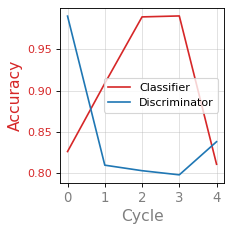

In [17]:
R.plot()